# Gestione e visualizzazione del dataset Pokemon con Pandas e Seaborn
<div>
<img src="https://i0.wp.com/lamia-puglia.com/wp-content/uploads/2019/11/https-2F2Fs3-ap-southeast-2.amazonaws.com2Fvms-tv-images-prod2F20172F102F1013172FPOKE_Pokemon_1920.jpg", width=500px/>
</div>

In [103]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.11/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['figsize', 'axes']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
plt.style.use('bmh')
plt.rcParams['figure.dpi'] = 100

Ora possiamo caricare il set di dati, chiamiamo il dataframe pokedata e diamo un'occhiata alle prime e alle ultime 10 righe del set di dati per avere una conoscenza generale dei dati.

In [ ]:
url = 'https://raw.githubusercontent.com/serivan/mldmlab/master/Datasets/Pokemon_all.csv'

pokedata = pd.read_csv(url)

In [ ]:
pokedata.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [ ]:
pokedata.tail(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
876,798,Kartana,grass,steel,570,59,181,131,59,31,109,7,False
877,799,Guzzlord,dark,dragon,570,223,101,53,97,53,43,7,False
878,800,Necrozma,psychic,NaN,600,97,107,101,127,89,79,7,True
879,801,Magearna,steel,fairy,600,80,95,115,130,115,65,7,True
880,802,Marshadow,fighting,ghost,600,90,125,80,90,90,125,7,True
881,803,Poipole,poison,NaN,420,67,73,67,73,67,73,7,False
882,804,Naganadel,poison,dragon,540,73,73,73,127,73,121,7,False
883,805,Stakataka,rock,steel,570,61,131,211,53,101,13,7,False
884,806,Blachepalon,fire,ghost,570,53,127,53,151,79,107,7,False
885,807,Zeraora,electric,NaN,600,88,112,75,102,80,143,7,True


## Cleaning the dataset
Se osserviamo attentamente le 10 righe del dataset sopra, possiamo notare alcuni problemi.

- Alcuni Pokémon hanno valori `NaN` (valori nulli) nella colonna `Tipo 2`

- Alcuni Pokémon hanno forme multiple e queste forme sono incluse in questo dataset

- Nella generazione 7, il tipo di Pokémon non inizia con una lettera maiuscola come in tutte le generazioni precedenti, Pandas lo considererà come un tipo diverso

Dobbiamo fare un po' di pulizia nel dataset prima che sia pronto per l'uso.

Ora mettiamo in maiuscolo solo la prima lettera del tipo di Pokémon.

In [ ]:
pokedata['Type 1'] = pokedata['Type 1'].str.capitalize()
pokedata['Type 2'] = pokedata['Type 2'].str.capitalize()

pokedata.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Rimuoviamo i Pokemon duplicati

In [ ]:
pokedata.drop_duplicates('#', keep='first', inplace=True)

pokedata.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False


Alcuni Pokémon non hanno un tipo secondario, quindi hanno `NaN` (valori nulli) nella colonna `Tipo 2`. Riempiamo i valori nulli nella colonna `Tipo 2` sostituendoli con il valore `None`.

In [ ]:
pokedata['Type 2'].fillna(value='None', inplace=True)

pokedata.head()

<ipython-input-62-25551d0e1d25>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pokedata['Type 2'].fillna(value='None', inplace=True)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
4,4,Charmander,Fire,None,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,None,405,58,64,58,80,65,80,1,False


Ora usiamo la colonna`#` come indice di `pokedata`

In [ ]:
pokedata.set_index('#', inplace=True)

pokedata.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
4,Charmander,Fire,None,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,None,405,58,64,58,80,65,80,1,False


Ora guardiamo ancora alle prime e ultime 10 righe del dataset

In [ ]:
pokedata.head(10)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
4,Charmander,Fire,None,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,None,405,58,64,58,80,65,80,1,False
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,Squirtle,Water,None,314,44,48,65,50,64,43,1,False
8,Wartortle,Water,None,405,59,63,80,65,80,58,1,False
9,Blastoise,Water,None,530,79,83,100,85,105,78,1,False


In [ ]:
pokedata.tail(10)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
798,Kartana,Grass,Steel,570,59,181,131,59,31,109,7,False
799,Guzzlord,Dark,Dragon,570,223,101,53,97,53,43,7,False
800,Necrozma,Psychic,None,600,97,107,101,127,89,79,7,True
801,Magearna,Steel,Fairy,600,80,95,115,130,115,65,7,True
802,Marshadow,Fighting,Ghost,600,90,125,80,90,90,125,7,True
803,Poipole,Poison,None,420,67,73,67,73,67,73,7,False
804,Naganadel,Poison,Dragon,540,73,73,73,127,73,121,7,False
805,Stakataka,Rock,Steel,570,61,131,211,53,101,13,7,False
806,Blachepalon,Fire,Ghost,570,53,127,53,151,79,107,7,False


I dati sono molto più puliti e ora sono pronti per l'uso. Ora possiamo fare analisi e visualizzazioni.

## Conteggio Pokemon in ogni generation
Per prima cosa, verifichiamo quanti Pokémon ci sono in questo dataset

In [ ]:
pokedata['Name'].count()

np.int64(807)

Vediamo ora come vengono distribuiti i Pokémon in ogni generation.

<Axes: xlabel='Generation', ylabel='count'>

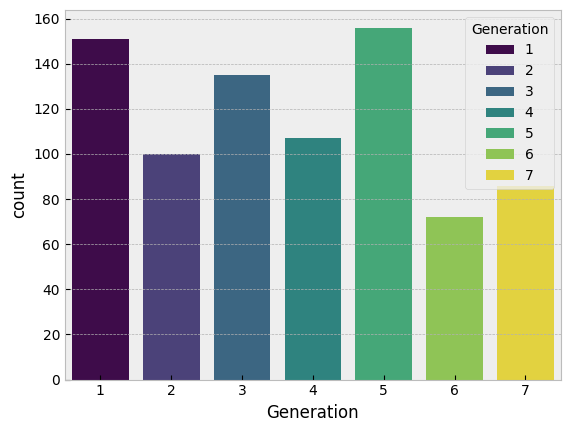

In [ ]:
sns.countplot(
    x='Generation',
    data=pokedata,
    palette='viridis',
    hue='Generation'
)

## conteggio Pokemon leggendari
I Pokémon leggendari sono un gruppo di Pokémon incredibilmente rari e spesso molto potenti, generalmente presenti in modo prominente nelle leggende e nei miti del mondo Pokémon.

Semplificheremo la categorizzazione e considereremo i Pokémon mitici e le Ultracreature come Pokémon leggendari. Innanzitutto, diamo un'occhiata alla loro rarità, e poi potremo visualizzare la distribuzione tra Pokémon leggendari e non leggendari.

In [ ]:
pokedata['Legendary'].value_counts()

,count
Legendary,
False,749
True,58


Ora guardiamo come sono distribuiti i leggendari in ogni generation

<Axes: xlabel='Generation', ylabel='count'>

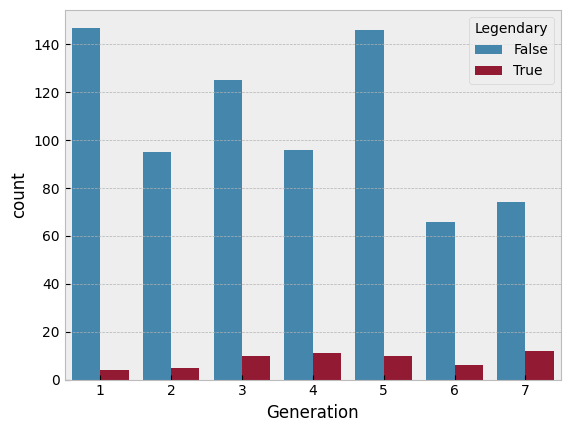

In [ ]:
sns.countplot(
    x='Generation',
    data=pokedata,
    hue='Legendary',
)

Inizialmente si poteva pensare che il numero di Pokémon leggendari fosse sempre correlato al numero di Pokémon in quella generazione, ma a quanto pare non è così. Non sembra esserci alcuna tendenza degna di nota.

## Distribuzione dei tipi di Pokemon
Ci sono 18 tipi di Pokémon in totale a partire dalla settima generazione. Alcuni Pokémon hanno un solo tipo, mentre altri hanno un tipo secondario. Ad esempio, Charmander è di tipo Fuoco, mentre Bulbasaur è sia di tipo Erba che di tipo Veleno.

In [ ]:
pokedata['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

Vediamo ora quali sono i tipi primari e secondari di Pokémon più comuni.

<Axes: ylabel='count'>

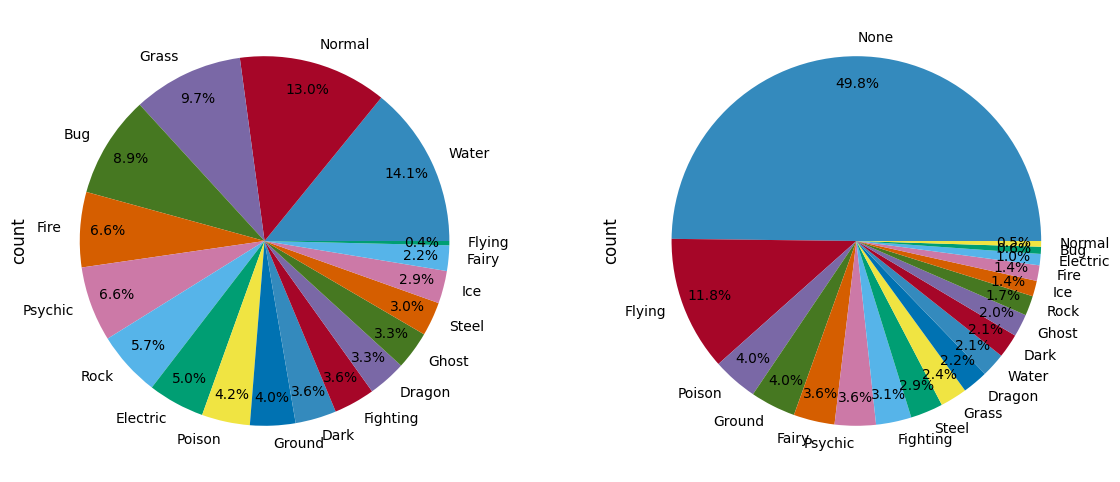

In [114]:
fig, axes = plt.subplots(nrows=1, ncols=2)
figsize=(14,6)

pokedata['Type 1'].value_counts().plot(kind='pie', autopct='%.1f%%', pctdistance=0.85, ax=axes[0])
pokedata['Type 2'].value_counts().plot(kind='pie', autopct='%.1f%%', pctdistance=0.85, ax=axes[1])

Possiamo già vedere quale tipo di Pokémon è il più e il meno comune, ma il grafico a torta non è la scelta ideale se il numero di fette è eccessivo, quindi utilizziamo semplicemente il grafico a barre.

Text(0.5, 0, '# di Pokemon')

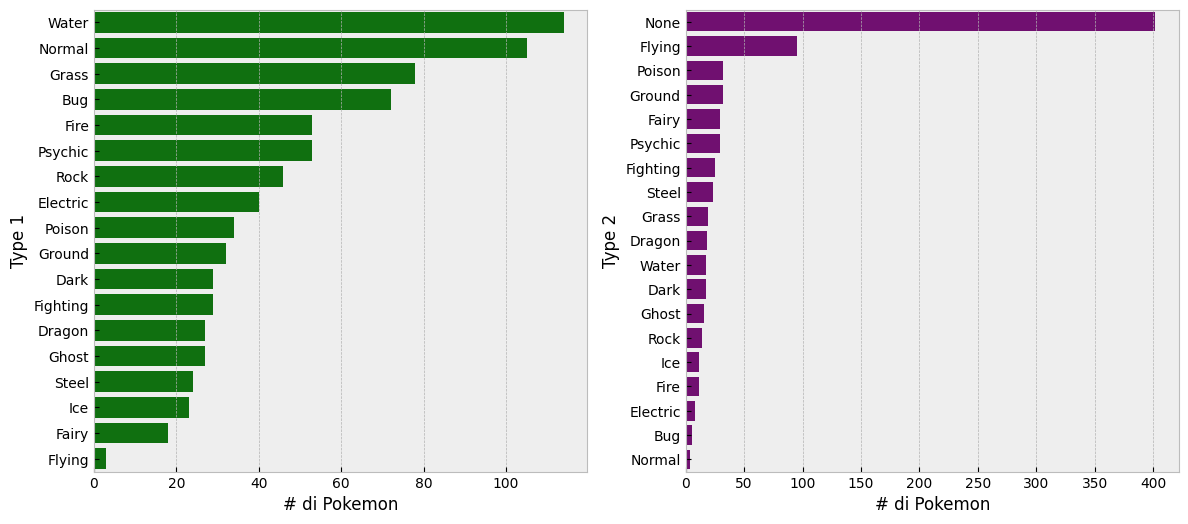

In [ ]:
fig, axes = plt.subplots(1,2)
sns.countplot(
    y='Type 1',
    data=pokedata,
    order=pokedata['Type 1'].value_counts().index,
    color='green',
    ax=axes[0]
).set_xlabel("# di Pokemon")

sns.countplot(
    y='Type 2',
    data=pokedata,
    order=pokedata['Type 2'].value_counts().index,
    color='purple',
    ax=axes[1]
).set_xlabel("# di Pokemon")

Ci sono molte informazioni che si possono ricavare dai grafici sopra, alcune delle quali interessanti sono:

- Quasi la metà dei Pokémon non ha un tipo secondario.
- Sebbene il tipo secondario più comune sia il Flying, è il tipo primario meno comune.

## Combinazione dei tipi di Pokemon

Abbiamo già visto qual è il tipo di Pokémon più e meno comune, sarà anche interessante vedere tutte le combinazioni di tipo dei Pokémon, nota che non includeremo i Pokémon che non hanno un tipo secondario

<Axes: xlabel='Type 2', ylabel='Type 1'>

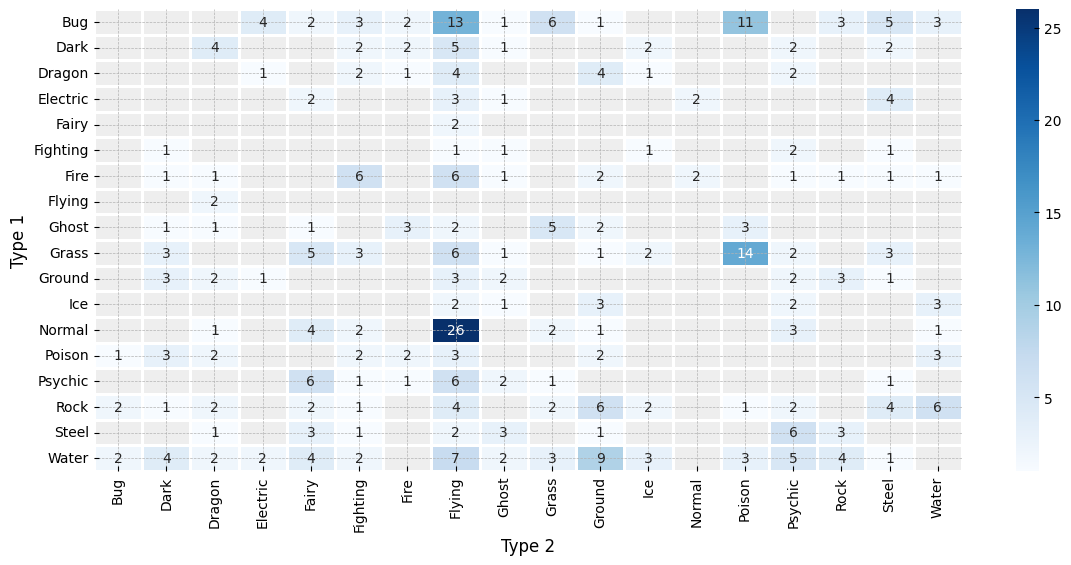

In [ ]:
figsize=(10,10)
sns.heatmap(
    pokedata[pokedata['Type 2']!='None'].groupby(['Type 1', 'Type 2']).size().unstack(),
    linewidths=1,
    cmap="Blues",
    annot=True,
)

Normal/Flying, Grass/Poison, Bug/Flying e Bug/Poison sono le 4 combinazioni più forti per i Pokemon con doppio tipo.

---

